In [ ]:
# courtesy of Rahul Khemani, rahulkhemani97@gmail.com

In [ ]:
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
from keras import losses
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
(x_train,y_train),(x_test,y_test)=boston_housing.load_data()

In [10]:
def baseline_model():
    model=Sequential()
    model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(13, kernel_initializer='normal'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


In [ ]:
MSE=[]
STD=[]
for Epochs in range(20,70,10):
    estimators=[]
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('nlp', KerasRegressor(build_fn=baseline_model, epochs=Epochs, batch_size=5, verbose=0)))
    pipeline=Pipeline(estimators)
    kfold=KFold(n_splits=10)
    results=cross_val_score(pipeline, x_train, y_train, scoring='neg_mean_squared_error', cv=kfold)
    MSE.append(results.mean())
    STD.append(results.std())

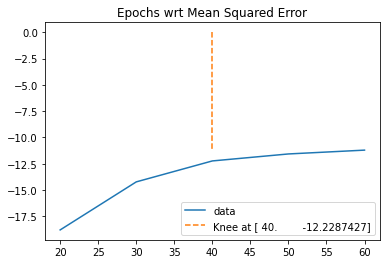

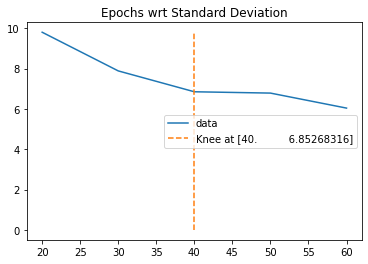

In [15]:
from kneefinder import KneeFinder
kf =KneeFinder(data_x=range(20,70,10), data_y=MSE)
kf2=KneeFinder(data_x=range(20,70,10), data_y=STD)
kf.plot('Epochs wrt Mean Squared Error')
kf2.plot('Epochs wrt Standard Deviation')